In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import path
# sys.path.append('/home/lewis841214/Desktop/1project/GameObjectDetection')

from utils import timeit



(918, 404) (1024, 541)
Function template_matching(array([[[ 17,  15,  16],
        [ 21,  19,  20],
        [ 23,  19,  21],
        ...,
        [ 37,  32,  21],
        [ 38,  32,  21],
        [ 38,  32,  22]],

       [[ 94,  96,  92],
        [ 91,  94,  89],
        [ 94,  95,  91],
        ...,
        [ 88,  86,  73],
        [ 84,  80,  68],
        [ 98,  94,  82]],

       [[ 54,  68,  52],
        [ 51,  70,  47],
        [ 55,  72,  49],
        ...,
        [ 54,  66,  40],
        [ 60,  71,  45],
        [ 61,  69,  46]],

       ...,

       [[ 96, 128,  79],
        [ 81, 122,  56],
        [ 79, 127,  51],
        ...,
        [ 61, 132,  51],
        [ 82, 143,  74],
        [  0,  16,   0]],

       [[  9,  20,   0],
        [  0,  14,   0],
        [  0,  17,   0],
        ...,
        [  0,  23,   0],
        [  0,  21,   0],
        [  0,   9,   0]],

       [[ 65,  61,  43],
        [ 65,  59,  34],
        [ 54,  51,  24],
        ...,
        [ 67,  70,  52],

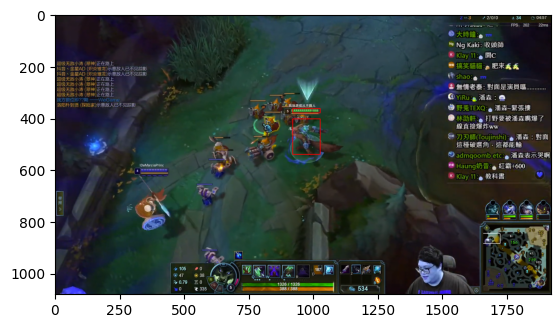

In [15]:

@timeit
def template_matching(template, target, meth = 'cv.TM_CCOEFF'):
    method = eval(meth)
    res = cv.matchTemplate(target,template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    w, h = template.shape[::-1][-2:] # template.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(target,top_left, bottom_right, 255, 2)
    
    top_left_residule = 40
    bottom_right_residule = 160
    top_left = (top_left[0], top_left[1] + top_left_residule)
    bottom_right = (bottom_right[0], bottom_right[1] + bottom_right_residule)
    print(top_left, bottom_right)
    cv.rectangle(target,top_left, bottom_right, 255, 2)

    # plt.subplot(131),plt.imshow(res)
    # plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    # plt.subplot(132),plt.imshow(target)
    # plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    # plt.suptitle(meth)

    # plt.subplot(133),plt.imshow(template)
    # plt.title('template Point'), plt.xticks([]), plt.yticks([])
    # plt.show()

    plt.imshow(target)
    

template = cv.imread('./data/objects/chracters/blue_blood/Screenshot from 2024-03-05 23-20-07.png' )#, cv.IMREAD_GRAYSCALE)

target = cv.imread('./data/video_frames/1709649898.0186276.png')#, cv.IMREAD_GRAYSCALE)
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# for meth in methods:
meth = 'cv.TM_CCOEFF_NORMED'
template_matching(template, target, meth)